# Regression diagnostics

This example file shows how to use a few of the ``statsmodels`` regression diagnostic tests in a real-life context. You can learn about more tests and find out more information about the tests here on the [Regression Diagnostics page.](https://www.statsmodels.org/stable/diagnostic.html)

Note that most of the tests described here only return a tuple of numbers, without any annotation. A full description of outputs is always included in the docstring and in the online ``statsmodels`` documentation. For presentation purposes, we use the ``zip(name,test)`` construct to pretty-print short descriptions in the examples below.

## Estimate a regression model

In [15]:
%matplotlib inline

In [16]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv"
dat = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 19 May 2024   Prob (F-statistic):           1.90e-08
Time:                        09:53:22   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

## Normality of the residuals

Omni test:

In [17]:
name = ["Chi^2", "Two-tail probability"]
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 3.7134378115971933), ('Two-tail probability', 0.15618424580304735)]

Jarque-Bera test:

Kurtosis below is the sample kurtosis, not the excess kurtosis. A sample from the normal distribution has kurtosis equal to 3.

In [18]:
name = ["Jarque-Bera test", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera test', 3.39360802484318),
 ('Chi^2 two-tail prob.', 0.18326831231663254),
 ('Skew', -0.4865803431122347),
 ('Kurtosis', 3.003417757881634)]

## Autorelation

Durbin-Watson test:

DW statistic always ranges from 0 to 4. The closer to 2, the less autocorrelation is in the sample.

In [20]:
name = ["Durbin-Watson statistic"]
test = [sms.durbin_watson(results.resid)]
lzip(name, test)

[('Durbin-Watson statistic', 2.0192168224545077)]

Breusch–Godfrey test for serial correlation:

In [21]:
name = ["Breusch-Pagan Lagrange multiplier test statistic", "p-value", "f-value", "f p-value"]
test = sms.acorr_breusch_godfrey(results)
lzip(name, test)

[('Breusch-Pagan Lagrange multiplier test statistic', 2.9930462802518925),
 ('p-value', 0.9815872336580139),
 ('f-value', 0.2632217768117006),
 ('f p-value', 0.9871702599878219)]

## Multicollinearity

Condition number

In [29]:
name = ["Condition Number"]
test = [np.linalg.cond(results.model.exog)]
lzip(name, test)

[('Condition Number', 702.1792145490066)]

## Influence tests

Once created, an object of class ``OLSInfluence`` holds attributes and methods that allow users to assess the influence of each observation. For example, we can compute and extract the first few rows of DFbetas by:

In [22]:
from statsmodels.stats.outliers_influence import OLSInfluence

test_class = OLSInfluence(results)
test_class.dfbetas[:5, :]

array([[-0.00301154,  0.00290872,  0.00118179],
       [-0.06425662,  0.04043093,  0.06281609],
       [ 0.01554894, -0.03556038, -0.00905336],
       [ 0.17899858,  0.04098207, -0.18062352],
       [ 0.29679073,  0.21249207, -0.3213655 ]])

Explore other options by typing `dir(influence_test)`

Useful information on leverage can also be plotted:

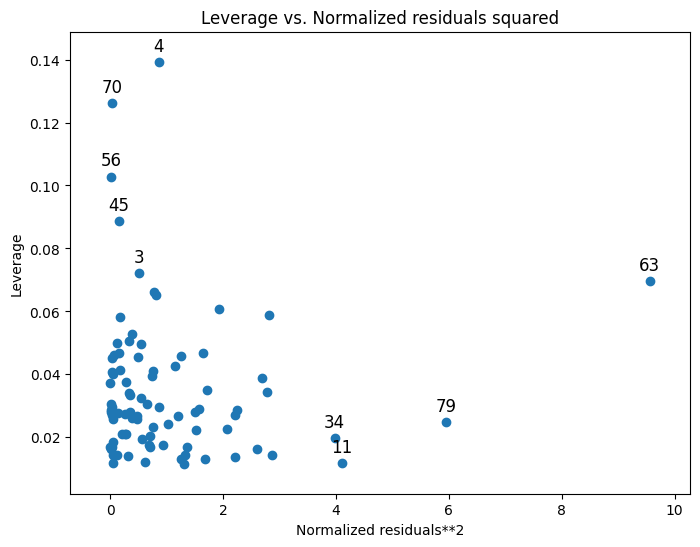

In [23]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(results, ax=ax)

Other plotting options can be found on the [Graphics page.](https://www.statsmodels.org/stable/graphics.html)

## Heteroskedasticity tests

Breush-Pagan test:

In [25]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 4.893213374094005),
 ('p-value', 0.08658690502352002),
 ('f-value', 2.5037159462564618),
 ('f p-value', 0.08794028782672814)]

Goldfeld-Quandt test

In [26]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 1.1002422436378143), ('p-value', 0.38202950686925324)]

## Linearity

Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

In [27]:
name = ["t value", "p value"]
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', -1.0796490077759802), ('p value', 0.2834639247569222)]